In [34]:
%matplotlib inline
import sys
sys.path.append("/Users/edwardlrichards/compAcoustics") 
sys.path.append("/Users/edwardlrichards/swellEx")

import numpy as np
import pandas as pd
import swellEx_env
from normalMode import Chinook
from wni import Corgi

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [35]:
f = 45

c_w = 1500
rho_w = 1000
c_b = 1800
rho_b = 1800
atten_b = 0.2
d = 100

world = swellEx_env.loadEnviornment()

In [49]:
zPlot = 212
rPlot = np.r_[10:8000:200j]

In [50]:
def calculateIz(f, sd):
    nm_model = Chinook(f, world)
    nm_model.calculateModes_eig(100, 10)
    modeNumber = nm_model.getKr()
    # print('Result for %i modes' %modeNumber.size)
    p_nm = nm_model.calculatePressure(sd, zPlot, rPlot)
    v_nm = nm_model.calculatePressure(sd, zPlot, rPlot, isPressure = False)
    Iz_nm = (1000 * 1500) * (1/2) * np.real(p_nm * np.conj(v_nm))

    wni_model = Corgi(world, sd, f, zPlot, np.max(rPlot))
    wni_model.integrateSpectrum()
    r_wni = wni_model.rRange
    p_wni = wni_model.getPressure()
    v_wni = 1j * 2 * np.pi * f * wni_model.getDisplacement()
    Iz_wni = (1000 * 1500) * (1/2) * np.real(p_wni * np.conj(v_wni))
    return Iz_nm, Iz_wni, r_wni, modeNumber.size

In [38]:
def makePlot(Iz_nm, Iz_wni, r_wni, modeNumber):
    _ = plt.plot(r_wni / 1e3, Iz_wni, label = 'wni')
    _ = plt.plot(rPlot / 1e3, Iz_nm, '--b', label = 'nm')
    _ = plt.xlim(0, 6)
    _ = plt.ylim(-1e-6, 1e-6)
    _ = plt.legend()
    _ = plt.xlabel('range, km')
    _ = plt.ylabel(r'$\rho c * I_z$')
    _ = plt.title('Vertical intensity for %i modes, sd = %i, f = %i Hz' %(modeNumber, sd, f))

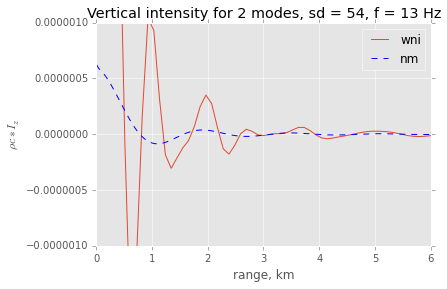

In [39]:
f = 13
sd = 54
(Iz_nm, Iz_wni, r_wni, modeNumber) = calculateIz(f, sd)
makePlot(Iz_nm, Iz_wni, r_wni, modeNumber)
plt.savefig('./figures/fig1')

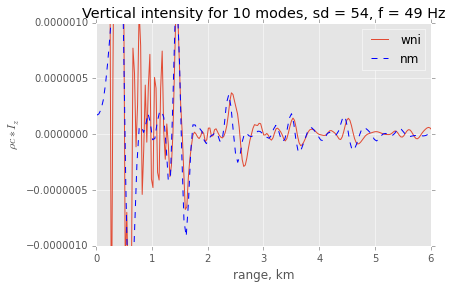

In [54]:
f = 49
sd = 54
(Iz_nm, Iz_wni, r_wni, modeNumber) = calculateIz(f, sd)
makePlot(Iz_nm, Iz_wni, r_wni, modeNumber)
plt.savefig('./figures/fig2')

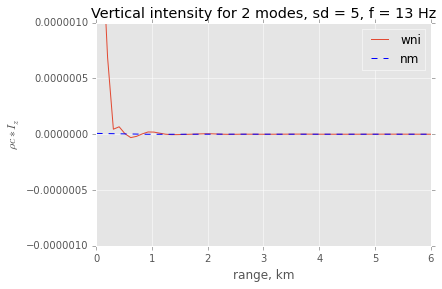

In [41]:
f = 13
sd = 5
(Iz_nm, Iz_wni, r_wni, modeNumber) = calculateIz(f, sd)
makePlot(Iz_nm, Iz_wni, r_wni, modeNumber)
plt.savefig('./figures/fig3')

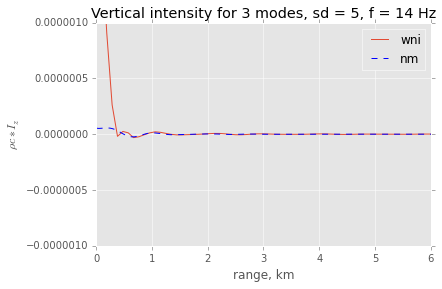

In [42]:
f = 14
sd = 5
(Iz_nm, Iz_wni, r_wni, modeNumber) = calculateIz(f, sd)
makePlot(Iz_nm, Iz_wni, r_wni, modeNumber)
plt.savefig('./figures/fig4')

In [43]:
f = 14
IZ_allDepth = []
zTest = (np.arange(150) + 2)
for sd in zTest:
    (Iz_nm, Iz_wni, r_wni, modeNumber) = calculateIz(f, sd)
    IZ_allDepth.append(Iz_wni)

In [44]:
IZ_allDepth = np.squeeze(np.array(IZ_allDepth))
IZ_allDepth.shape
R,Z = np.meshgrid(r_wni, zTest)

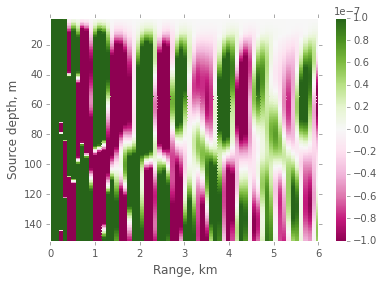

In [45]:
_ = plt.pcolormesh(R/1e3, Z, IZ_allDepth, cmap = plt.get_cmap('PiYG'))
_ = plt.xlim(0, 6)
_ = plt.clim(-1e-7, 1e-7)
_ = plt.ylim(np.max(zTest), np.min(zTest))
_ = plt.colorbar()
_ = plt.ylabel('Source depth, m')
_ = plt.xlabel('Range, km')
plt.savefig('./figures/fig5')

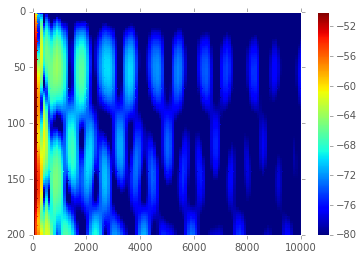

In [46]:
sd = 5
zPlot = np.r_[1:200:100j]
wni_model = Corgi(world, sd, f, zPlot, np.max(rPlot))
wni_model.integrateSpectrum()
p_wni = wni_model.getPressure()
r_wni = p_wni.index

TL = 20 * np.log10(np.abs(p_wni))
Z, R = np.meshgrid(zPlot, r_wni)
_ = plt.pcolormesh(R.T, Z.T, np.array(TL).T)
_ = plt.clim(-80, -50)
_ = plt.xlim(0, 10000)
_ = plt.ylim(np.max(zPlot), 0)
_ = plt.colorbar()
plt.savefig('./figures/fig6')

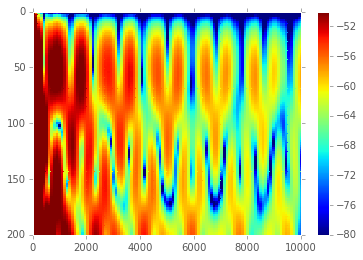

In [47]:
sd = 54
zPlot = np.r_[1:200:100j]
wni_model = Corgi(world, sd, f, zPlot, np.max(rPlot))
wni_model.integrateSpectrum()
p_wni = wni_model.getPressure()
r_wni = p_wni.index

TL = 20 * np.log10(np.abs(p_wni))
Z, R = np.meshgrid(zPlot, r_wni)
_ = plt.pcolormesh(R.T, Z.T, np.array(TL).T)
_ = plt.clim(-80, -50)
_ = plt.xlim(0, 10000)
_ = plt.ylim(np.max(zPlot), 0)
_ = plt.colorbar()
plt.savefig('./figures/fig7')